In [31]:
import re
import nltk
from urllib.request import urlopen
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
response = urlopen('http://python.org/')

In [3]:
html = response.read()

In [4]:
html

b'<!doctype html>\n<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->\n<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->\n<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->\n\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">\n\n    <meta name="application-name" content="Python.org">\n    <meta name="msapplication-tooltip" content="The official home of the Python Programming Language">\n    <meta name="apple-mobile-web-app-title" content="Python.org">\n    <meta name="apple-mobile-web-app-capable" content="yes">\n    <meta name="apple-mobile-web-app-status-bar-style" content="black">\n\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n    <meta name="Ha

In [5]:
soup = BeautifulSoup(html, 'html.parser')

In [6]:
html_string=soup.get_text()
html_string = re.sub('\W+',' ',html_string)
tokens = html_string.split()



In [7]:
html_string

' Welcome to Python org context https schema org type WebSite url https www python org potentialAction type SearchAction target https www python org search q search_term_string query input required name search_term_string var _gaq _gaq _gaq push _setAccount UA 39055973 1 _gaq push _trackPageview function var ga document createElement script ga type text javascript ga async true ga src https document location protocol https ssl http www google analytics com ga js var s document getElementsByTagName script 0 s parentNode insertBefore ga s Notice While Javascript is not essential for this website your interaction with the content will be limited Please turn Javascript on for the full experience Skip to content Close Python PSF Docs PyPI Jobs Community The Python Network Donate Menu Search This Site GO A A Smaller Larger Reset Socialize Facebook Twitter Chat on IRC About Applications Quotes Getting Started Help Python Brochure Downloads All releases Source code Windows Mac OS X Other Platf

In [8]:
print(len(html))

48876


### EDA in nlp

In [9]:

# 用正则表达式将文字分割
tokens = [tok for tok in html.split()]
print('total num of tokens', len(tokens))
print(tokens[:100])


total num of tokens 2890
[b'<!doctype', b'html>', b'<!--[if', b'lt', b'IE', b'7]>', b'<html', b'class="no-js', b'ie6', b'lt-ie7', b'lt-ie8', b'lt-ie9">', b'<![endif]-->', b'<!--[if', b'IE', b'7]>', b'<html', b'class="no-js', b'ie7', b'lt-ie8', b'lt-ie9">', b'<![endif]-->', b'<!--[if', b'IE', b'8]>', b'<html', b'class="no-js', b'ie8', b'lt-ie9">', b'<![endif]-->', b'<!--[if', b'gt', b'IE', b'8]><!--><html', b'class="no-js"', b'lang="en"', b'dir="ltr">', b'<!--<![endif]-->', b'<head>', b'<meta', b'charset="utf-8">', b'<meta', b'http-equiv="X-UA-Compatible"', b'content="IE=edge">', b'<link', b'rel="prefetch"', b'href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">', b'<meta', b'name="application-name"', b'content="Python.org">', b'<meta', b'name="msapplication-tooltip"', b'content="The', b'official', b'home', b'of', b'the', b'Python', b'Programming', b'Language">', b'<meta', b'name="apple-mobile-web-app-title"', b'content="Python.org">', b'<meta', b'name="apple-mobile-web-ap

In [10]:
tokens = re.split('\W+',html)
print(len(tokens))
print(tokens[:100])

TypeError: cannot use a string pattern on a bytes-like object

### 统计词频

In [22]:
import operator
freq_dis = {}
for tok in html_string.split():
    if tok in freq_dis:
        freq_dis[tok]+=1
    else:
        freq_dis[tok]=1
sorted_freq_dist = sorted(freq_dis.items(),key = operator.itemgetter(1),reverse = True)

In [23]:
sorted_freq_dist

[('Python', 59),
 ('and', 21),
 ('to', 17),
 ('for', 15),
 ('3', 15),
 ('2020', 15),
 ('the', 14),
 ('s', 13),
 ('is', 13),
 ('a', 12),
 ('with', 11),
 ('News', 11),
 ('Events', 11),
 ('of', 10),
 ('1', 9),
 ('Community', 9),
 ('More', 9),
 ('in', 9),
 ('PSF', 8),
 ('Software', 8),
 ('2', 7),
 ('org', 6),
 ('ga', 6),
 ('Docs', 6),
 ('The', 6),
 ('Guide', 6),
 ('print', 6),
 ('product', 6),
 ('https', 5),
 ('python', 5),
 ('name', 5),
 ('0', 5),
 ('Development', 5),
 ('8', 5),
 ('that', 5),
 ('Foundation', 5),
 ('02', 5),
 ('_gaq', 4),
 ('document', 4),
 ('script', 4),
 ('your', 4),
 ('be', 4),
 ('on', 4),
 ('Lists', 4),
 ('PyCon', 4),
 ('User', 4),
 ('Group', 4),
 ('Archive', 4),
 ('an', 4),
 ('n', 4),
 ('b', 4),
 ('5', 4),
 ('programming', 4),
 ('functions', 4),
 ('other', 4),
 ('are', 4),
 ('17', 4),
 ('01', 4),
 ('type', 3),
 ('www', 3),
 ('var', 3),
 ('js', 3),
 ('this', 3),
 ('IRC', 3),
 ('Started', 3),
 ('Help', 3),
 ('All', 3),
 ('code', 3),
 ('Documentation', 3),
 ('Visual', 3)

### nltk统计词频 的办法

In [26]:
freq_dist_nltk = nltk.FreqDist(html_string.split())
print(freq_dist_nltk)
for k,v in freq_dist_nltk.items():
    print(str(k)+ ':'+str(v))

<FreqDist with 514 samples and 1102 outcomes>
Welcome:1
to:17
Python:59
org:6
context:1
https:5
schema:1
type:3
WebSite:1
url:1
www:3
python:5
potentialAction:1
SearchAction:1
target:1
search:1
q:1
search_term_string:2
query:1
input:2
required:1
name:5
var:3
_gaq:4
push:2
_setAccount:1
UA:1
39055973:1
1:9
_trackPageview:1
function:2
ga:6
document:4
createElement:1
script:4
text:1
javascript:1
async:1
true:1
src:2
location:1
protocol:1
ssl:1
http:1
google:1
analytics:1
com:1
js:3
s:13
getElementsByTagName:1
0:5
parentNode:1
insertBefore:1
Notice:1
While:1
Javascript:2
is:13
not:1
essential:1
for:15
this:3
website:1
your:4
interaction:1
with:11
the:14
content:2
will:2
be:4
limited:1
Please:1
turn:1
on:4
full:1
experience:1
Skip:1
Close:1
PSF:8
Docs:6
PyPI:2
Jobs:2
Community:9
The:6
Network:1
Donate:2
Menu:1
Search:1
This:1
Site:1
GO:1
A:2
Smaller:1
Larger:1
Reset:1
Socialize:1
Facebook:1
Twitter:1
Chat:1
IRC:3
About:2
Applications:2
Quotes:2
Getting:2
Started:3
Help:3
Brochure:2
Download

### 生成的对象可以直接画图
最好去除了停用词之后在画

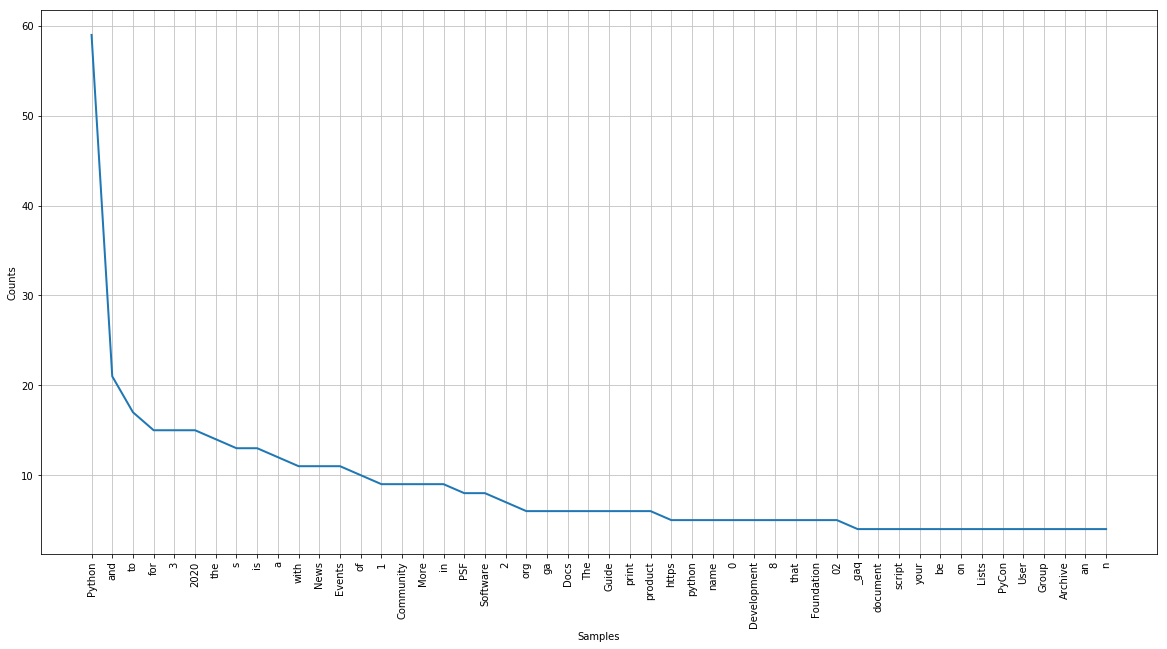

In [34]:
plt.figure(figsize = (20,10))
freq_dist_nltk.plot(50,cumulative = False)

### 文本的整理与清洗
即为从原始数据中获得可读的格式化文本前，所进行的所有预处理工作
包括
1.数据改写（munging）
2.文本清洗
3.特定预处理
4.标记解析（tokenization）
5.词干提取
6.词形还原
7.停用此删除

#### 句子拆分器
将一串string 拆分成句子构成的列表。一个典型的句子拆分器可以非常简单地根据字符串中的(.)进行拆分，也可以非常复杂地使用预测式分类期识别句子边界。


In [40]:
from nltk.tokenize import sent_tokenize
inputstring = 'This is an example snet. the sentence splitter will split on sent markers. Ohh really!!'

all_sent = sent_tokenize(inputstring)
print(all_sent)



inputstring = '我啊是个狼人。骗人，你才不是呢！对啊？我的却是'

all_sent = sent_tokenize(inputstring)
print('似乎对中文的句子边界没用')
print(all_sent)

['This is an example snet.', 'the sentence splitter will split on sent markers.', 'Ohh really!', '!']
似乎对中文的句子边界没用
['我啊是个狼人。骗人，你才不是呢！对啊？我的却是']


sent_tokenize在内部使用了NLTK中预测句子的边界检测算法。如果应用程序需要自定义句子拆分器，可以使用一些方式来训练自己的句子拆分器

先前的句子拆分器在所有17种语言中都是可用的。只需要制定相应的序列化对象。

创建自己的句子拆分器的机会不多，目前的句子拆分器已经足够处理各种文本语料库了。

In [37]:
import nltk.tokenize.punkt
tokenizer = nltk.tokenize.punkt.PunktSentenceTokenizer()

#### 标记解析（tokenizer）
俗称「分词」， 英文中的分词比较简单。nltk里面也有配预制好的分词方法，自定义的分词方法，等等

In [63]:
s = 'Hi Everyone! hola gr8$ '
#简单的分词
print(s.split()) #默认根据空格
print(s.split('!')) #也可以设定一个分隔符，但是分隔符不会出现在分词里面
from nltk.tokenize import word_tokenize #这个连标点符号也会被分走
print(word_tokenize(s))

from nltk.tokenize import regexp_tokenize, wordpunct_tokenize,blankline_tokenize
print(regexp_tokenize(s,pattern = '\w+')) #用正则表达式之匹配符合要求的分词，标点符号就不会给分进去
print(regexp_tokenize(s,pattern = '[a-zA-Z0-9$]+')) #匹配小写字母，大写字母，数字或金钱符号

print(regexp_tokenize(s,pattern = '\d')) #只匹配数字

print(wordpunct_tokenize(s)) #标点符号会被分出来
print(blankline_tokenize(s)) # 不知道有啥用

['Hi', 'Everyone!', 'hola', 'gr8$']
['Hi Everyone', ' hola gr8$ ']
['Hi', 'Everyone', '!', 'hola', 'gr8', '$']
['Hi', 'Everyone', 'hola', 'gr8']
['Hi', 'Everyone', 'hola', 'gr8$']
['8']
['Hi', 'Everyone', '!', 'hola', 'gr8', '$']
['Hi Everyone! hola gr8$ ']


#### 词干提取（stemming）
演示： https://text-processing.com/
可以将token的不同变体都归一化，比如eating, eaten,eats都会变成eat。

在某些应用中，在eat和eaten之间做区分没有意义。因此，就用stemming，将两个经过语法变形的单词，归结到单词的根

大部分时候，词干提取是由于期间单行而得到应用，而对于一些复杂语言或复杂的nlp任务，有必要使用词形还原（lemmatization）代替词干提取。

词干提取是低配版的词形还原。



In [70]:
from nltk.stem import  PorterStemmer 
from nltk.stem.lancaster import LancasterStemmer
# from nltk.stem.Snowball import SnowballStemmer # 没法用snowball
pst = PorterStemmer()
lst = LancasterStemmer()
print(lst.stem('eating'))
print(pst.stem('shopping'))

eat
shop


使用基于规则的基本词干提取器，如消除-s/es或ing 或  ed， 可以达到70%以上的精度，而porter词干提取器使用了更多规则，获得了更高的正确率。

使用英语的化porter和snowball 就够用了。

有时候，人们甚至忽略了词干提取这个预处理步骤，因此，是否使用词干提取通常取决于领域和应用。




#### 词形还原
词形还原是相对有条理的方式，转换单词词根和所有语法/折叠形式

词形还原使用上下问和词性，确定单词的折叠形式，根据每个单词的词性，应用不同的标准化规则，得到词根单词

